# Part 4: Analysis


In [1]:
# pip install packages not currently downloaded on your device.
!pip install prophet
!pip install pymongo 

In [2]:
# Import dependecies
import pandas as pd
import numpy as np
import requests
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

## 4.1 - Neighborhood Analysis

In [3]:
# Fetch data from API endpoint
url = 'http://127.0.0.1:5000/data'    
response = requests.get(url)
data = response.json()

# Convert JSON data to DataFrame
crime_analysis_df = pd.DataFrame(data)

# Display the column names to verify them
print(crime_analysis_df.columns)

Index(['Analysis Neighborhood', 'Incident Category', 'Incident Date',
       'Incident Datetime', 'Incident Day of Week', 'Incident Description',
       'Incident Subcategory', 'Incident Time', 'Incident Year', 'Latitude',
       'Longitude', 'Neighborhoods', 'Resolution'],
      dtype='object')


In [4]:
# Show first 5 rows of DataFrame
crime_analysis_df.head(5)

,Analysis Neighborhood,Incident Category,Incident Date,Incident Datetime,Incident Day of Week,Incident Description,Incident Subcategory,Incident Time,Incident Year,Latitude,Longitude,Neighborhoods,Resolution
0,Potrero Hill,Assault,2023/03/16,2023/03/16 05:30:00 PM,Thursday,Battery,Simple Assault,17:30,2023,37.762290,-122.401324,54.0,Open or Active
1,Bayview Hunters Point,Assault,2022/07/02,2022/07/02 10:53:00 PM,Saturday,Battery,Simple Assault,22:53,2022,37.719298,-122.390020,88.0,Open or Active
2,Mission,Assault,2021/07/07,2021/07/07 08:18:00 AM,Wednesday,Battery,Simple Assault,08:18,2021,37.753837,-122.418594,53.0,Cite or Arrest Adult
3,Tenderloin,Assault,2021/06/04,2021/06/04 09:40:00 AM,Friday,Battery,Simple Assault,09:40,2021,37.785893,-122.419739,20.0,Cite or Arrest Adult
4,Potrero Hill,Missing Person,2021/08/16,2021/08/16 02:05:00 PM,Monday,Found Person,Missing Person,14:05,2021,37.760026,-122.396284,54.0,Open or Active


In [5]:
# Count the total incidents for each 'Analysis Neighborhood'
neighborhood_incident_counts = crime_analysis_df['Analysis Neighborhood'].value_counts()

# Display the counts
print(neighborhood_incident_counts)

Analysis Neighborhood
Mission                           50307
Tenderloin                        45673
Financial District/South Beach    42201
South of Market                   37294
Bayview Hunters Point             29923
North Beach                       20453
Western Addition                  16913
Hayes Valley                      16300
Marina                            15580
Sunset/Parkside                   14975
Nob Hill                          14653
Russian Hill                      14226
Castro/Upper Market               14181
Outer Richmond                    11818
West of Twin Peaks                10580
Pacific Heights                   10266
Bernal Heights                     9928
Potrero Hill                       9464
Haight Ashbury                     8479
Chinatown                          8477
Excelsior                          8373
Mission Bay                        7770
Inner Sunset                       7365
Lakeshore                          7239
Inner Richmond    

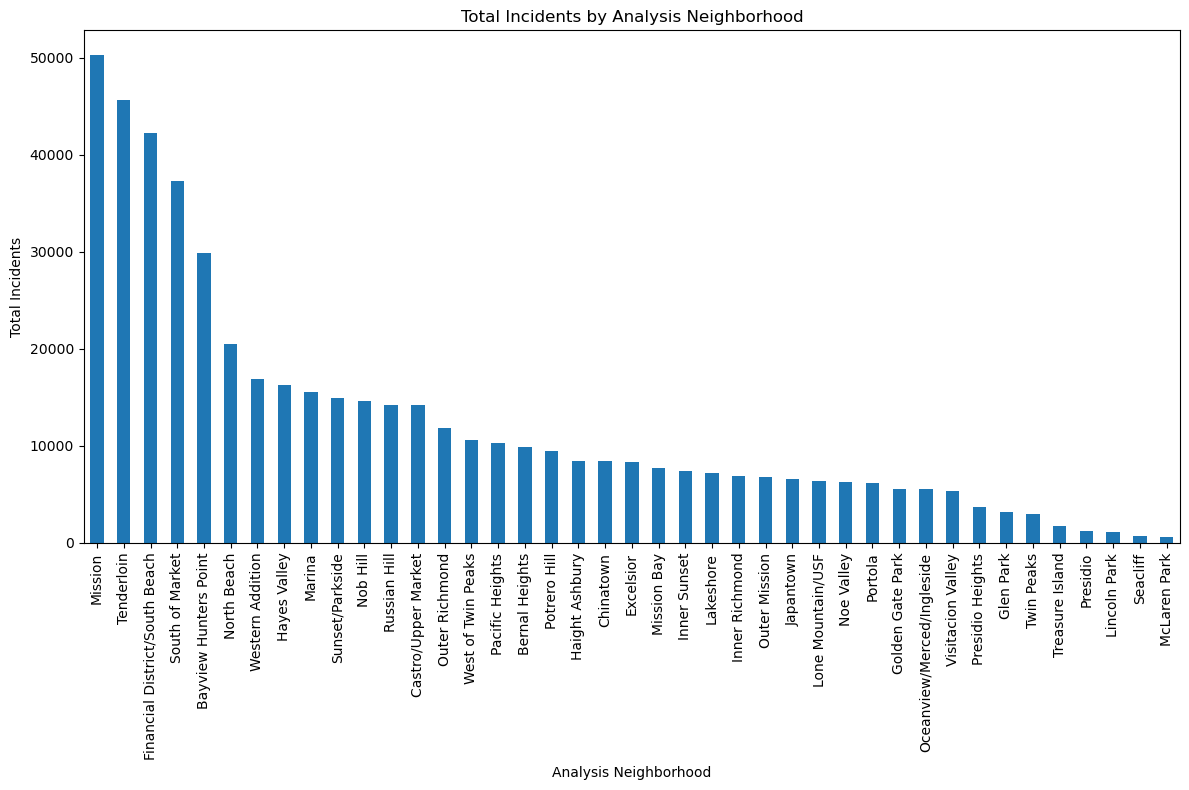

In [6]:
# Bar chart to show least safe neighborhoods SF

# Plot the bar chart
plt.figure(figsize=(12, 8))
neighborhood_incident_counts.plot(kind='bar')
plt.title('Total Incidents by Analysis Neighborhood')
plt.xlabel('Analysis Neighborhood')
plt.ylabel('Total Incidents')
plt.xticks(rotation=90) 
plt.tight_layout()

# Save as png in images folder
plt.savefig('../images/neighborhood_incidents_bar_chart.png')

# Show the plot
plt.show()

In [7]:
# Find the top 10 neighborhoods with the most incidents
top_neighborhood_crime_counts = crime_analysis_df['Analysis Neighborhood'].value_counts().nlargest(10)

In [8]:
# List of neighborhoods with the most amount of incidents, convert to DF
least_safe_neighborhoods_df = pd.DataFrame(top_neighborhood_crime_counts)

print("Neighborhoods with the most amount of incidents:")
least_safe_neighborhoods_df.head(10)

Neighborhoods with the most amount of incidents:


,count
Analysis Neighborhood,
Mission,50307
Tenderloin,45673
Financial District/South Beach,42201
South of Market,37294
Bayview Hunters Point,29923
North Beach,20453
Western Addition,16913
Hayes Valley,16300
Marina,15580


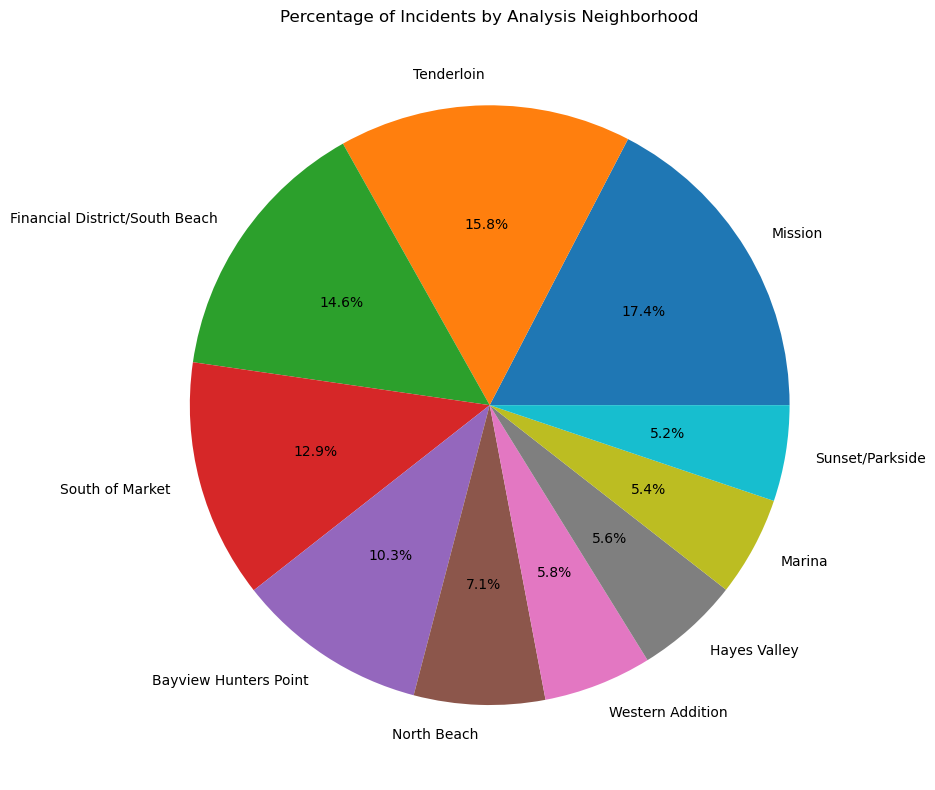

In [9]:
# Pie chart to show the top 10 neighborhoods with the most incidents

# Plot the pie chart
plt.figure(figsize=(10, 8))
top_neighborhood_crime_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Incidents by Analysis Neighborhood')
plt.ylabel('')
plt.tight_layout()

# Save as png in images folder
plt.savefig('../images/neighborhood_incidents_pie_chart.png')

# Show the plot
plt.show()

In [10]:
# Find the safest neighborhoods in San Francisco
neighborhoods_least_incidents = neighborhood_incident_counts.nsmallest(10) 

safe_neighborhoods_df = pd.DataFrame(neighborhoods_least_incidents)

# Display the neighborhoods with the least amount of incidents
print("Neighborhoods with the least amount of incidents:")
safe_neighborhoods_df.head(10)

Neighborhoods with the least amount of incidents:


,count
Analysis Neighborhood,
McLaren Park,598
Seacliff,720
Lincoln Park,1170
Presidio,1218
Treasure Island,1781
Twin Peaks,2974
Glen Park,3151
Presidio Heights,3686
Visitacion Valley,5361


In [11]:
neighborhood_yearly_sum = crime_analysis_df.groupby(["Analysis Neighborhood", "Incident Year"]).size().unstack(fill_value=0)

# Ensure column names are integers
neighborhood_yearly_sum.columns = neighborhood_yearly_sum.columns.astype(int)

# Check if 2018 is a column
if 2018 not in neighborhood_yearly_sum.columns:
    print("Year 2018 is not in the columns")
else:
    neighborhood_yearly_sum_sorted = neighborhood_yearly_sum.sort_values(by=2018, ascending=False)
    print(neighborhood_yearly_sum_sorted)

Incident Year                   2018  2019  2020  2021  2022  2023  2024
Analysis Neighborhood                                                   
Mission                         9844  8592  6435  7273  7991  7755  2417
Financial District/South Beach  9014  8697  4838  6275  6696  5374  1307
Tenderloin                      7930  7504  6318  6124  7772  7434  2591
South of Market                 7331  6400  4819  4847  6154  6074  1669
Bayview Hunters Point           4587  4639  4427  4943  5052  4950  1325
North Beach                     3586  2999  1800  3958  3994  3418   698
Western Addition                2991  2936  2328  2324  2762  2660   912
Hayes Valley                    2635  2935  2484  2448  2506  2728   564
Castro/Upper Market             2616  2351  2283  2426  2093  1852   560
Sunset/Parkside                 2559  2243  2101  2267  2528  2471   806
Russian Hill                    2524  2221  1733  2592  2411  2263   482
Nob Hill                        2425  2652  2117  2

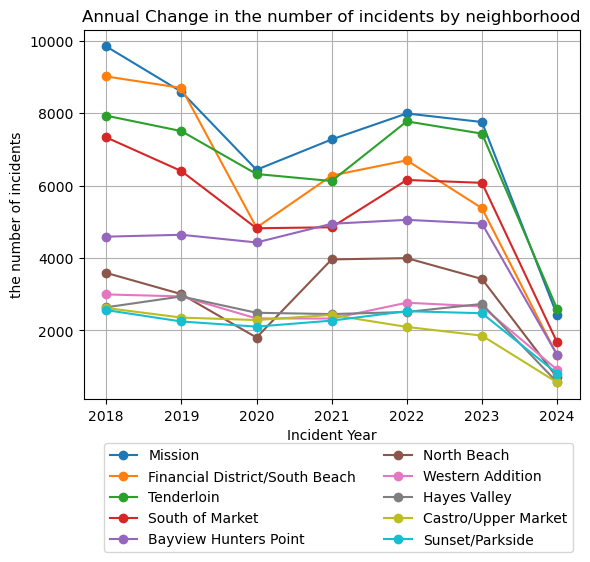

In [12]:
top_10_neighborhoods = neighborhood_yearly_sum_sorted.head(10)

incident_years = top_10_neighborhoods.columns

for neighborhood in top_10_neighborhoods.index:
    plt.plot(incident_years, top_10_neighborhoods.loc[neighborhood], marker='o', linestyle='-', label=neighborhood)

plt.xlabel("Incident Year")
plt.ylabel("the number of incidents")
plt.title("Annual Change in the number of incidents by neighborhood")
plt.grid(True)
plt.legend(ncol=2,bbox_to_anchor=(1, -0.1))
plt.show()

## 4.2 Crime Category Analysis

In [13]:
# Count crime occurance grouped by category and year
count_category_df = crime_analysis_df.groupby(["Incident Year", "Incident Category"]).size().unstack(fill_value=0)
count_category_df

Incident Category,Arson,Assault,Burglary,Drug Offense,Homicide,"Human Trafficking (A), Commercial Sex Acts","Human Trafficking (B), Involuntary Servitude","Human Trafficking, Commercial Sex Acts",Larceny Theft,Malicious Mischief,Missing Person,Motor Vehicle Theft,Offences Against The Family And Children,Prostitution,Rape,Robbery,Sex Offense,Vandalism,Weapons Offense
Incident Year,,,,,,,,,,,,,,,,,,,
2018,353,8677,6883,3847,23,68,1,4,43469,8206,3659,5103,1978,335,44,3499,171,170,735
2019,303,8413,5819,3383,12,10,0,9,43153,8306,3270,5184,1836,231,35,3311,155,192,725
2020,416,6701,8928,2402,12,8,0,4,27625,8169,2543,7302,1664,59,23,2652,137,319,863
2021,420,7449,8544,2091,14,12,0,2,34036,9407,2427,7733,1810,58,30,2468,107,375,1070
2022,391,8331,7061,3616,25,7,0,1,37730,8824,2588,7982,1726,27,32,2660,111,335,1031
2023,370,8321,6544,4210,44,4,1,3,33665,8502,2544,8657,1478,57,34,3060,137,381,1038
2024,154,2853,1993,1547,13,1,0,0,8049,2458,862,2639,483,27,8,862,52,128,306


In [14]:
# Find the sum for each category 
count_category_df.sum()

Incident Category
Arson                                             2407
Assault                                          50745
Burglary                                         45772
Drug Offense                                     21096
Homicide                                           143
Human Trafficking (A), Commercial Sex Acts         110
Human Trafficking (B), Involuntary Servitude         2
Human Trafficking, Commercial Sex Acts              23
Larceny Theft                                   227727
Malicious Mischief                               53872
Missing Person                                   17893
Motor Vehicle Theft                              44600
Offences Against The Family And Children         10975
Prostitution                                       794
Rape                                               206
Robbery                                          18512
Sex Offense                                        870
Vandalism                                      

In [15]:
# Reformat for stacking
switch_df=count_category_df.T
switch_df

Incident Year,2018,2019,2020,2021,2022,2023,2024
Incident Category,,,,,,,
Arson,353,303,416,420,391,370,154
Assault,8677,8413,6701,7449,8331,8321,2853
Burglary,6883,5819,8928,8544,7061,6544,1993
Drug Offense,3847,3383,2402,2091,3616,4210,1547
Homicide,23,12,12,14,25,44,13
"Human Trafficking (A), Commercial Sex Acts",68,10,8,12,7,4,1
"Human Trafficking (B), Involuntary Servitude",1,0,0,0,0,1,0
"Human Trafficking, Commercial Sex Acts",4,9,4,2,1,3,0
Larceny Theft,43469,43153,27625,34036,37730,33665,8049


In [16]:
switch_df.sum()

Incident Year
2018    87225
2019    84347
2020    69827
2021    78053
2022    82478
2023    79050
2024    22435
dtype: int64

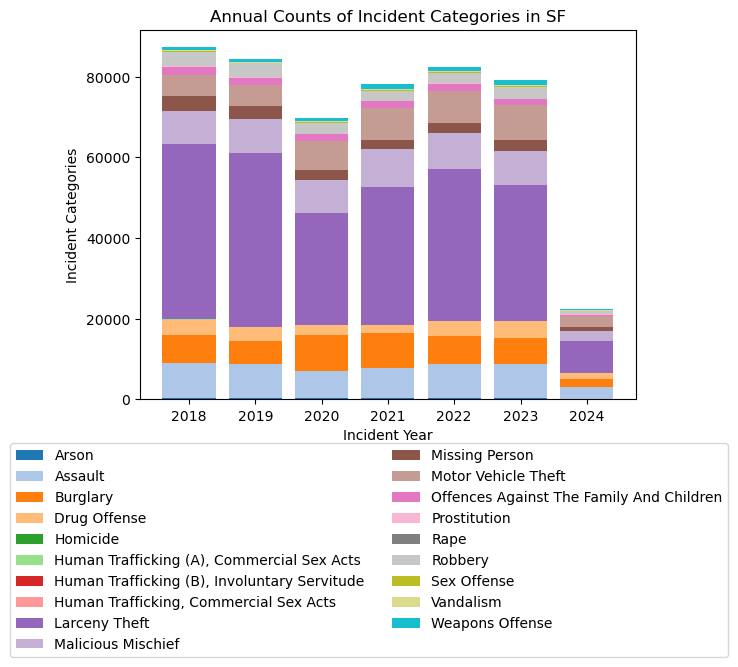

<Figure size 1800x1200 with 0 Axes>

In [17]:
bottom = None
colors = plt.cm.tab20.colors

for i,col in enumerate(count_category_df.columns[0:]):
    bar=plt.bar(count_category_df.index,count_category_df[col],label =col, bottom=bottom,color=colors[i])
    if bottom is None:
        bottom = count_category_df[col]
    else:
        bottom += count_category_df[col]
        
plt.xlabel("Incident Year")
plt.ylabel("Incident Categories")

plt.title("Annual Counts of Incident Categories in SF")
plt.legend(ncol=2,bbox_to_anchor=(1.2, -0.1))
plt.figure(figsize=(18, 12))
# plt.savefig("../images/Trends_in_incidents.png",bbox_inches='tight',transparent=True)

plt.show()

## 4.3 - Datetime Analysis

In [18]:
# Load the data from the heatmap
data = pd.read_csv('../data/data_hm.csv')
datetime_df = pd.DataFrame(data)

# Display DataFrame
datetime_df.head(5) 

,category,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,00:00-05:59,291,216,198,212,219,219,301
1,06:00-11:59,254,312,273,262,269,284,251
2,12:00-17:59,440,507,443,525,474,496,468
3,18:00-23:59,380,430,444,426,456,492,461


In [19]:
# Display basic statistics
stats = datetime_df.describe()
stats

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,341.250000,366.250000,339.500000,356.250000,354.500000,372.750000,370.250000
std,84.440808,128.313094,123.931433,144.951429,129.425654,142.509356,110.765142
min,254.000000,216.000000,198.000000,212.000000,219.000000,219.000000,251.000000
25%,281.750000,288.000000,254.250000,249.500000,256.500000,267.750000,288.500000
50%,335.500000,371.000000,358.000000,344.000000,362.500000,388.000000,381.000000
75%,395.000000,449.250000,443.250000,450.750000,460.500000,493.000000,462.750000
max,440.000000,507.000000,444.000000,525.000000,474.000000,496.000000,468.000000


In [20]:
min_val = 198
max_val = 507

# Calculate the interquartile range
range_val = max_val - min_val

# Quartiles
q1 = min_val + range_val * 0.25
q2 = min_val + range_val * 0.50
q3 = min_val + range_val * 0.75

print("Low Range:", min_val, "to", q1)
print("Medium Range:", q1, "to", q2)
print("High Range:", q2, "to", q3)
print("Extreme Range:", q3, "to", max_val)

Low Range: 198 to 275.25
Medium Range: 275.25 to 352.5
High Range: 352.5 to 429.75
Extreme Range: 429.75 to 507


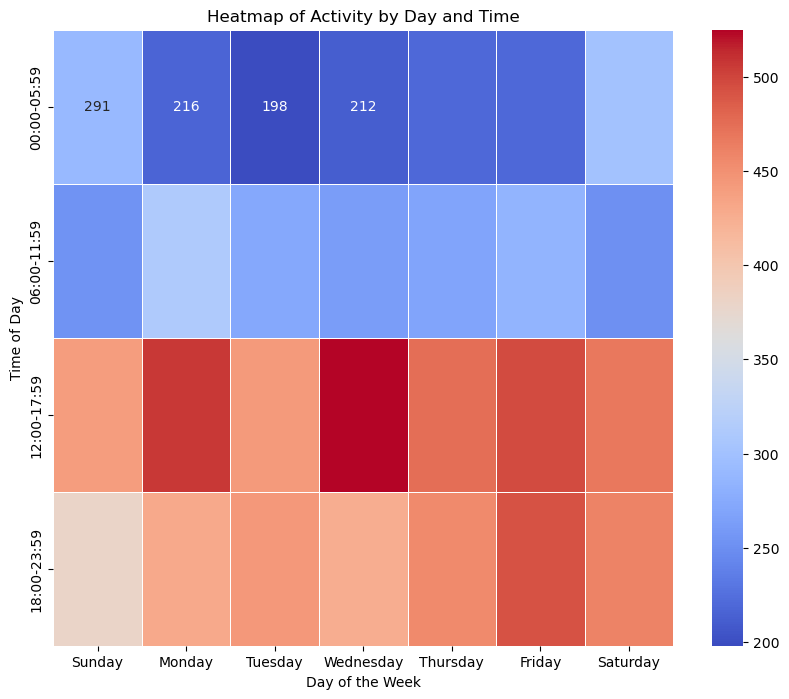

In [21]:
# Plot a heatmap with seaborn

datetime_df.set_index('category', inplace=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(datetime_df, annot=True, cmap='coolwarm', fmt="d", linewidths=.5)
plt.title('Heatmap of Activity by Day and Time')
plt.xlabel('Day of the Week')
plt.ylabel('Time of Day')
plt.savefig("../images/heatmap_sb")

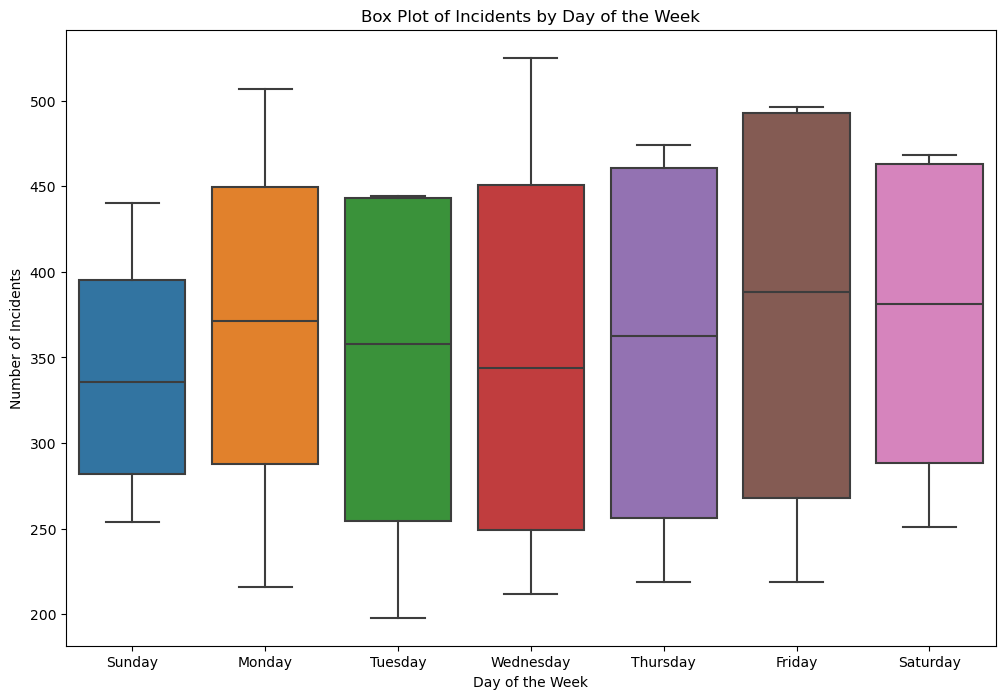

In [22]:
# Create box plot for analysis of crime by day of week
datetime_df = pd.DataFrame(data)
datetime_df.set_index('category', inplace=True)

# Convert the DataFrame from wide to long format
df_long = datetime_df.reset_index().melt(id_vars='category', var_name='Day', value_name='Incidents')

# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Day', y='Incidents',data=df_long)
plt.title('Box Plot of Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.savefig("../images/incidents_day_week")


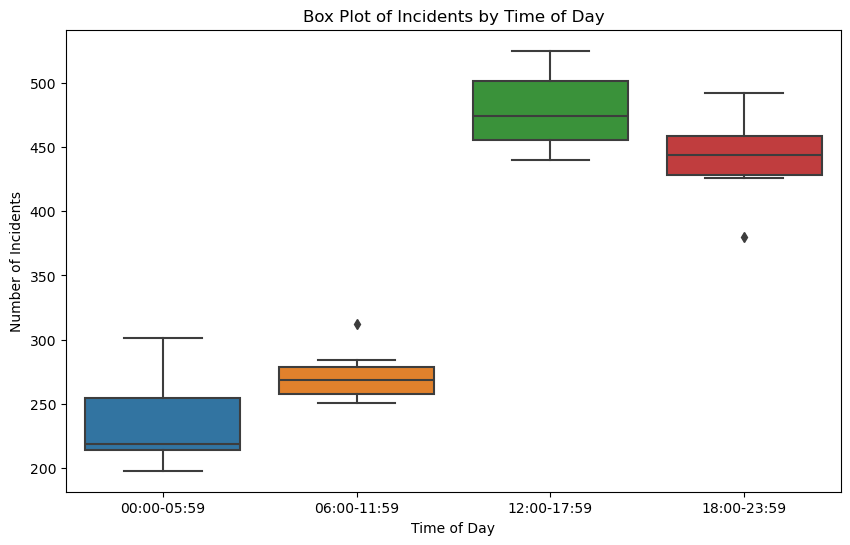

In [23]:
# Create box plot for analysis of crime by time of day
datetime_df = pd.DataFrame(data)

# Step 1: Melt the DataFrame to long format
df_long = datetime_df.melt(id_vars='category', var_name='Day', value_name='Incidents')

# Step 2: Aggregate data by category, ignoring the specific days
aggregated_data = df_long.groupby('category')['Incidents'].apply(list).reset_index()

# Step 3: Explode the list to separate rows for plotting
exploded_data = aggregated_data.explode('Incidents')

# Convert 'Incidents' to numeric (if necessary)
exploded_data['Incidents'] = pd.to_numeric(exploded_data['Incidents'])

# Step 4: Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='Incidents', data=exploded_data)
plt.title('Box Plot of Incidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
plt.savefig("../images/incidents_timeofday.png")
plt.show()


## 4.4 - Forecasting & Projections

In [24]:
# Fetch data from API endpoint
url = 'http://127.0.0.1:5000/data'    
response = requests.get(url)
data = response.json()

# Convert JSON data to DataFrame
df_forecast = pd.DataFrame(data)

# Display the column names to verify them
print(df_forecast.columns)

Index(['Analysis Neighborhood', 'Incident Category', 'Incident Date',
       'Incident Datetime', 'Incident Day of Week', 'Incident Description',
       'Incident Subcategory', 'Incident Time', 'Incident Year', 'Latitude',
       'Longitude', 'Neighborhoods', 'Resolution'],
      dtype='object')


In [25]:
len(df_forecast)

503415

11:10:16 - cmdstanpy - INFO - Chain [1] start processing
11:10:16 - cmdstanpy - INFO - Chain [1] done processing


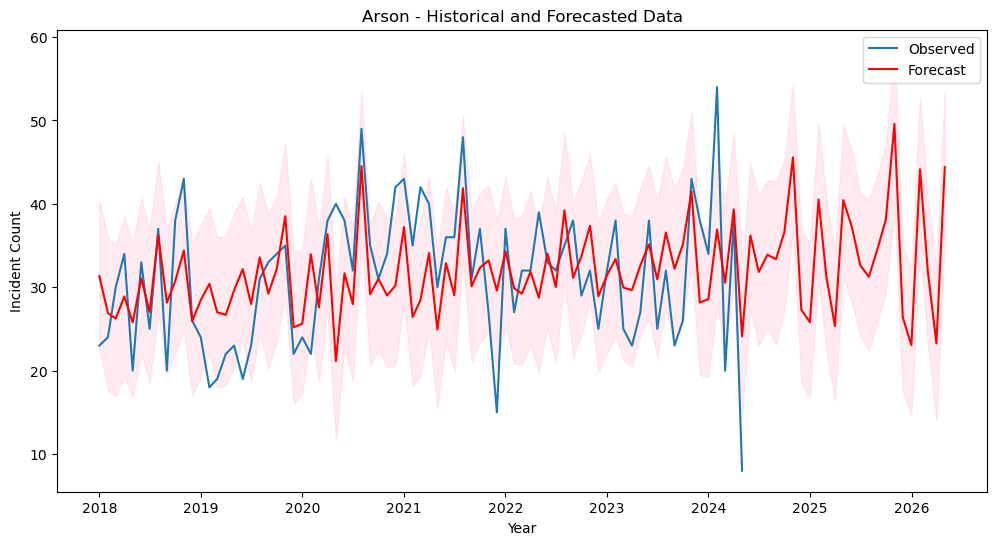

  0%|          | 0/7 [00:00<?, ?it/s]

11:10:16 - cmdstanpy - INFO - Chain [1] start processing
11:10:23 - cmdstanpy - INFO - Chain [1] done processing
11:10:23 - cmdstanpy - INFO - Chain [1] start processing
11:10:32 - cmdstanpy - INFO - Chain [1] done processing
11:10:32 - cmdstanpy - INFO - Chain [1] start processing
11:10:32 - cmdstanpy - INFO - Chain [1] done processing
11:10:32 - cmdstanpy - INFO - Chain [1] start processing
11:10:32 - cmdstanpy - INFO - Chain [1] done processing
11:10:32 - cmdstanpy - INFO - Chain [1] start processing
11:10:32 - cmdstanpy - INFO - Chain [1] done processing
11:10:32 - cmdstanpy - INFO - Chain [1] start processing
11:10:32 - cmdstanpy - INFO - Chain [1] done processing
11:10:32 - cmdstanpy - INFO - Chain [1] start processing
11:10:32 - cmdstanpy - INFO - Chain [1] done processing
11:10:33 - cmdstanpy - INFO - Chain [1] start processing


     horizon        mae         mse      mape
0    79 days  14.412931  609.526186  0.545001
1    81 days  13.452649  578.524223  0.477422
2    85 days  14.159901  588.006192  0.496526
3    86 days  13.094766  567.099908  0.468053
4    90 days  13.393225  569.158248  0.479984
..       ...        ...         ...       ...
148 719 days  19.485166  515.340203  0.686282
149 723 days  18.902147  494.861045  0.666662
150 724 days  19.037775  498.657670  0.676355
151 728 days  19.516691  503.892453  0.687180
152 730 days  20.033168  531.523377  0.871896

[153 rows x 4 columns]


11:10:33 - cmdstanpy - INFO - Chain [1] done processing


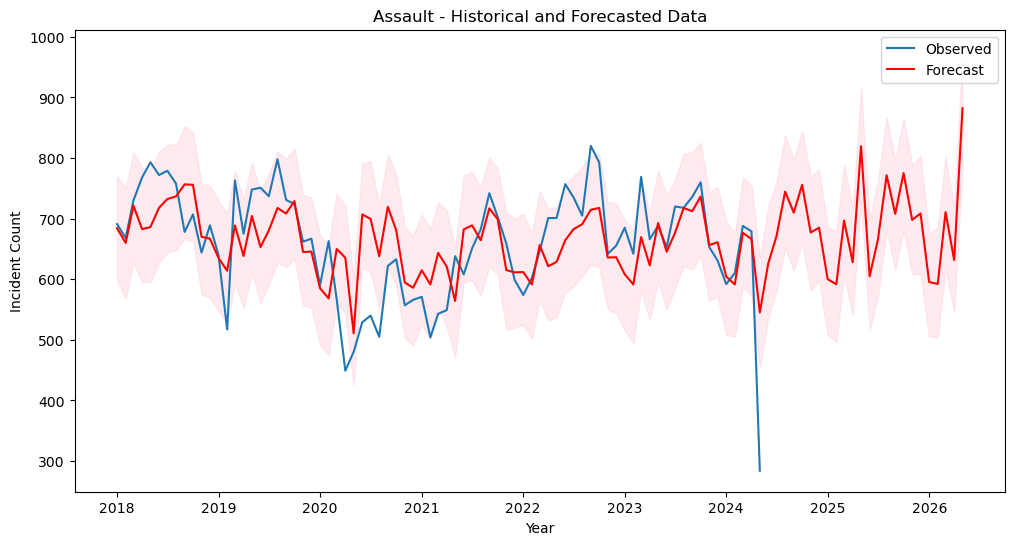

  0%|          | 0/7 [00:00<?, ?it/s]

11:10:33 - cmdstanpy - INFO - Chain [1] start processing
11:10:40 - cmdstanpy - INFO - Chain [1] done processing
11:10:40 - cmdstanpy - INFO - Chain [1] start processing
11:10:48 - cmdstanpy - INFO - Chain [1] done processing
11:10:48 - cmdstanpy - INFO - Chain [1] start processing
11:10:48 - cmdstanpy - INFO - Chain [1] done processing
11:10:48 - cmdstanpy - INFO - Chain [1] start processing
11:10:48 - cmdstanpy - INFO - Chain [1] done processing
11:10:48 - cmdstanpy - INFO - Chain [1] start processing
11:10:48 - cmdstanpy - INFO - Chain [1] done processing
11:10:48 - cmdstanpy - INFO - Chain [1] start processing
11:10:49 - cmdstanpy - INFO - Chain [1] done processing
11:10:49 - cmdstanpy - INFO - Chain [1] start processing
11:10:49 - cmdstanpy - INFO - Chain [1] done processing
11:10:49 - cmdstanpy - INFO - Chain [1] start processing


     horizon         mae            mse      mape
0    79 days  262.933112  209053.195754  0.388089
1    81 days  267.548945  210106.571177  0.400358
2    85 days  268.533757  210249.750129  0.404277
3    86 days  249.024041  198234.135174  0.363371
4    90 days  253.822543  199077.402389  0.371015
..       ...         ...            ...       ...
148 719 days  173.894175   45963.883040  0.238435
149 723 days  186.774431   50539.952717  0.259476
150 724 days  200.899129   54639.863777  0.279816
151 728 days  186.393035   46199.712530  0.265535
152 730 days  190.953805   49710.424379  0.329950

[153 rows x 4 columns]


11:10:49 - cmdstanpy - INFO - Chain [1] done processing


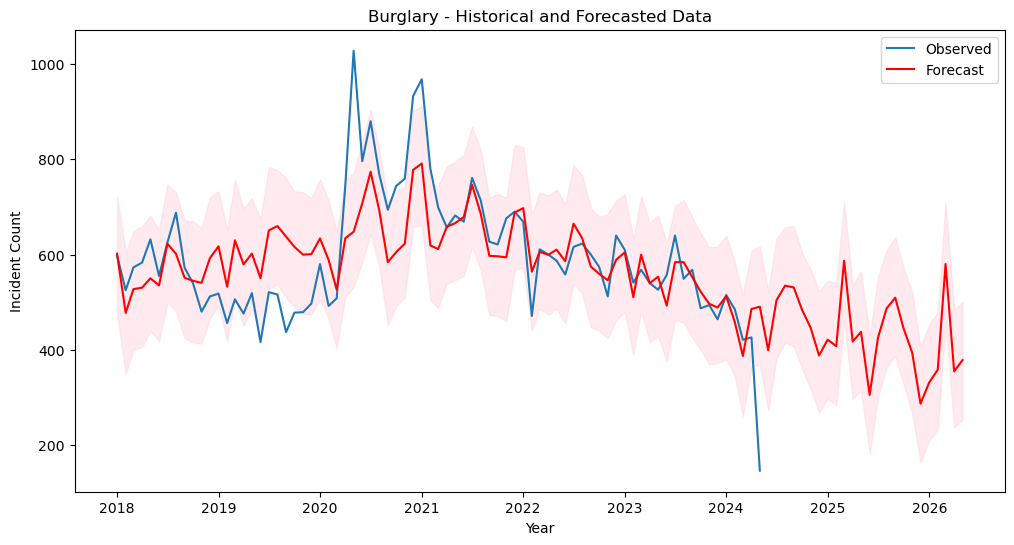

  0%|          | 0/7 [00:00<?, ?it/s]

11:10:49 - cmdstanpy - INFO - Chain [1] start processing
11:10:56 - cmdstanpy - INFO - Chain [1] done processing
11:10:56 - cmdstanpy - INFO - Chain [1] start processing
11:11:04 - cmdstanpy - INFO - Chain [1] done processing
11:11:04 - cmdstanpy - INFO - Chain [1] start processing
11:11:05 - cmdstanpy - INFO - Chain [1] done processing
11:11:05 - cmdstanpy - INFO - Chain [1] start processing
11:11:05 - cmdstanpy - INFO - Chain [1] done processing
11:11:05 - cmdstanpy - INFO - Chain [1] start processing
11:11:05 - cmdstanpy - INFO - Chain [1] done processing
11:11:05 - cmdstanpy - INFO - Chain [1] start processing
11:11:05 - cmdstanpy - INFO - Chain [1] done processing
11:11:05 - cmdstanpy - INFO - Chain [1] start processing
11:11:05 - cmdstanpy - INFO - Chain [1] done processing
11:11:05 - cmdstanpy - INFO - Chain [1] start processing


     horizon         mae            mse      mape
0    79 days  221.030623   67469.691055  0.365693
1    81 days  192.425066   53823.763119  0.296263
2    85 days  173.067684   45890.241434  0.255030
3    86 days  148.835744   31530.383035  0.225512
4    90 days  160.280624   35748.007236  0.255902
..       ...         ...            ...       ...
148 719 days  411.120089  214250.555051  0.714964
149 723 days  433.249313  243736.295886  0.769137
150 724 days  448.635719  252775.469286  0.801210
151 728 days  425.836272  227578.075160  0.771485
152 730 days  448.610609  256765.622790  1.073331

[153 rows x 4 columns]


11:11:06 - cmdstanpy - INFO - Chain [1] done processing


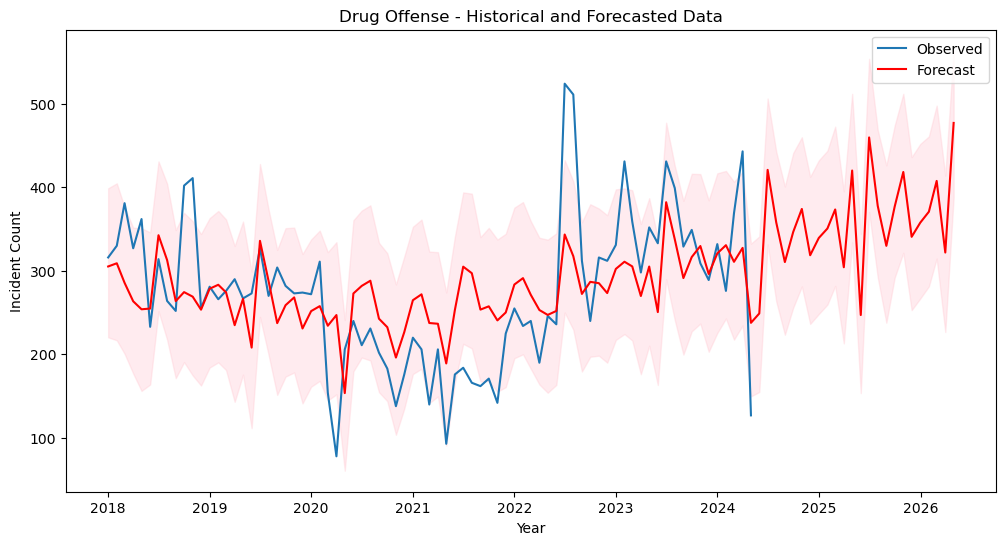

  0%|          | 0/7 [00:00<?, ?it/s]

11:11:06 - cmdstanpy - INFO - Chain [1] start processing
11:11:07 - cmdstanpy - INFO - Chain [1] done processing
11:11:07 - cmdstanpy - INFO - Chain [1] start processing
11:11:16 - cmdstanpy - INFO - Chain [1] done processing
11:11:16 - cmdstanpy - INFO - Chain [1] start processing
11:11:16 - cmdstanpy - INFO - Chain [1] done processing
11:11:16 - cmdstanpy - INFO - Chain [1] start processing
11:11:16 - cmdstanpy - INFO - Chain [1] done processing
11:11:16 - cmdstanpy - INFO - Chain [1] start processing
11:11:16 - cmdstanpy - INFO - Chain [1] done processing
11:11:16 - cmdstanpy - INFO - Chain [1] start processing
11:11:16 - cmdstanpy - INFO - Chain [1] done processing
11:11:16 - cmdstanpy - INFO - Chain [1] start processing
11:11:16 - cmdstanpy - INFO - Chain [1] done processing
11:11:16 - cmdstanpy - INFO - Chain [1] start processing
11:11:17 - cmdstanpy - INFO - Chain [1] done processing


     horizon         mae           mse      mape
0    79 days  101.822949  19436.996089  0.370212
1    81 days   93.082559  16344.674037  0.342648
2    85 days   78.492423  12874.599834  0.289565
3    86 days   75.428810  12655.532506  0.278106
4    90 days   74.270586  12437.186637  0.264044
..       ...         ...           ...       ...
148 719 days  236.632760  74177.764004  0.994872
149 723 days  241.817390  75780.712119  0.990013
150 724 days  253.526294  80946.356711  1.012760
151 728 days  253.715554  81030.660130  1.013803
152 730 days  238.143735  75403.525133  0.988272

[153 rows x 4 columns]


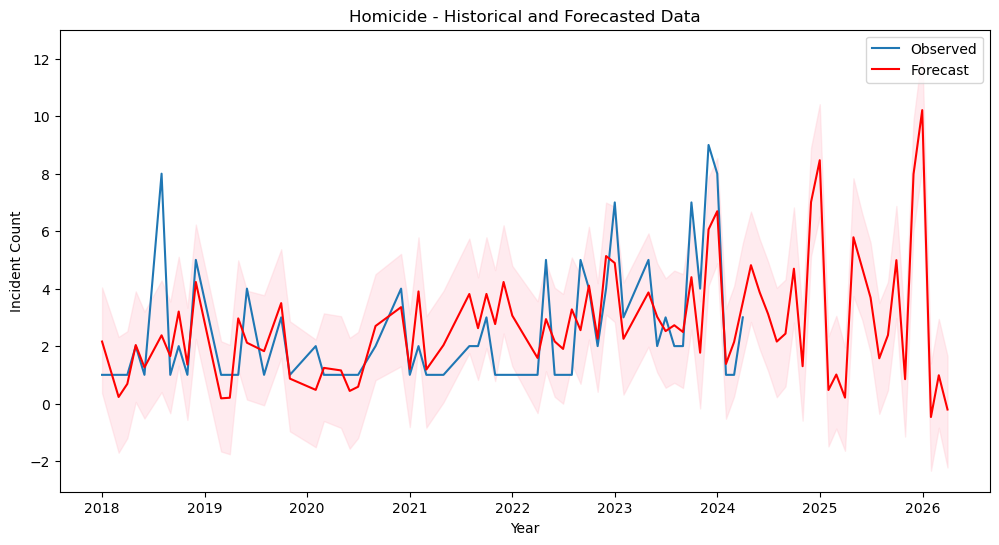

  0%|          | 0/7 [00:00<?, ?it/s]

11:11:17 - cmdstanpy - INFO - Chain [1] start processing
11:11:22 - cmdstanpy - INFO - Chain [1] done processing
11:11:22 - cmdstanpy - INFO - Chain [1] start processing
11:11:28 - cmdstanpy - INFO - Chain [1] done processing
11:11:28 - cmdstanpy - INFO - Chain [1] start processing
11:11:30 - cmdstanpy - INFO - Chain [1] done processing
11:11:30 - cmdstanpy - INFO - Chain [1] start processing
11:11:30 - cmdstanpy - INFO - Chain [1] done processing
11:11:30 - cmdstanpy - INFO - Chain [1] start processing
11:11:30 - cmdstanpy - INFO - Chain [1] done processing
11:11:30 - cmdstanpy - INFO - Chain [1] start processing
11:11:30 - cmdstanpy - INFO - Chain [1] done processing
11:11:30 - cmdstanpy - INFO - Chain [1] start processing
11:11:30 - cmdstanpy - INFO - Chain [1] done processing
11:11:30 - cmdstanpy - INFO - Chain [1] start processing
11:11:30 - cmdstanpy - INFO - Chain [1] done processing


     horizon       mae         mse      mape
0    80 days  6.629581  115.251728  5.489719
1    84 days  5.770557  105.905379  4.630694
2    89 days  5.593029  105.172515  4.453167
3    90 days  5.425710  104.510194  4.285847
4   105 days  5.812862  106.487636  4.672999
..       ...       ...         ...       ...
108 717 days  4.702341   58.544919  3.390707
109 719 days  4.376782   57.029607  3.243506
110 722 days  3.190567   37.229853  2.624805
111 727 days  3.011825   34.839336  2.045019
112 730 days  3.061282   34.984350  2.061505

[113 rows x 4 columns]


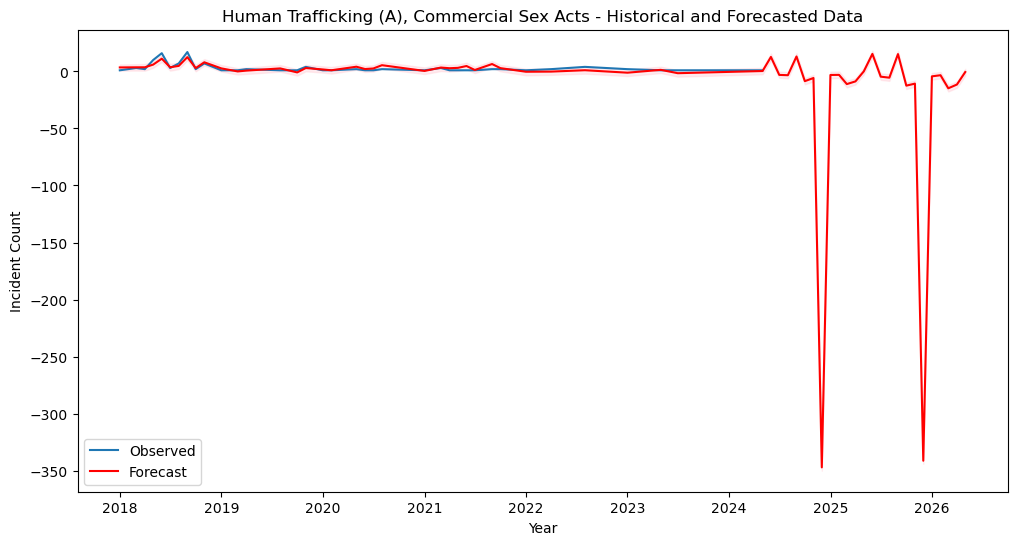

  0%|          | 0/7 [00:00<?, ?it/s]

11:11:31 - cmdstanpy - INFO - Chain [1] start processing
11:11:31 - cmdstanpy - INFO - Chain [1] done processing
11:11:31 - cmdstanpy - INFO - Chain [1] start processing
11:11:38 - cmdstanpy - INFO - Chain [1] done processing
11:11:38 - cmdstanpy - INFO - Chain [1] start processing
11:11:45 - cmdstanpy - INFO - Chain [1] done processing
11:11:45 - cmdstanpy - INFO - Chain [1] start processing
11:11:53 - cmdstanpy - INFO - Chain [1] done processing
11:11:53 - cmdstanpy - INFO - Chain [1] start processing
11:11:53 - cmdstanpy - INFO - Chain [1] done processing
11:11:53 - cmdstanpy - INFO - Chain [1] start processing
11:11:53 - cmdstanpy - INFO - Chain [1] done processing
11:11:53 - cmdstanpy - INFO - Chain [1] start processing
11:11:53 - cmdstanpy - INFO - Chain [1] done processing
11:11:53 - cmdstanpy - INFO - Chain [1] start processing
11:11:53 - cmdstanpy - INFO - Chain [1] done processing


    horizon        mae         mse       mape
0   59 days   9.056630  133.138988   9.056630
1   75 days   6.608269   69.412907   6.608269
2   79 days  13.849445  516.246387  13.849445
3   81 days  14.350175  522.391373  13.786705
4   91 days  14.040442  518.087214  12.848674
..      ...        ...         ...        ...
60 687 days  10.310527  139.447581   6.059363
61 689 days  11.238259  153.750868   6.523230
62 714 days   9.856447  136.418624   5.141418
63 724 days   8.829293  116.880741   5.518449
64 730 days   7.966841  104.172985   5.645120

[65 rows x 4 columns]


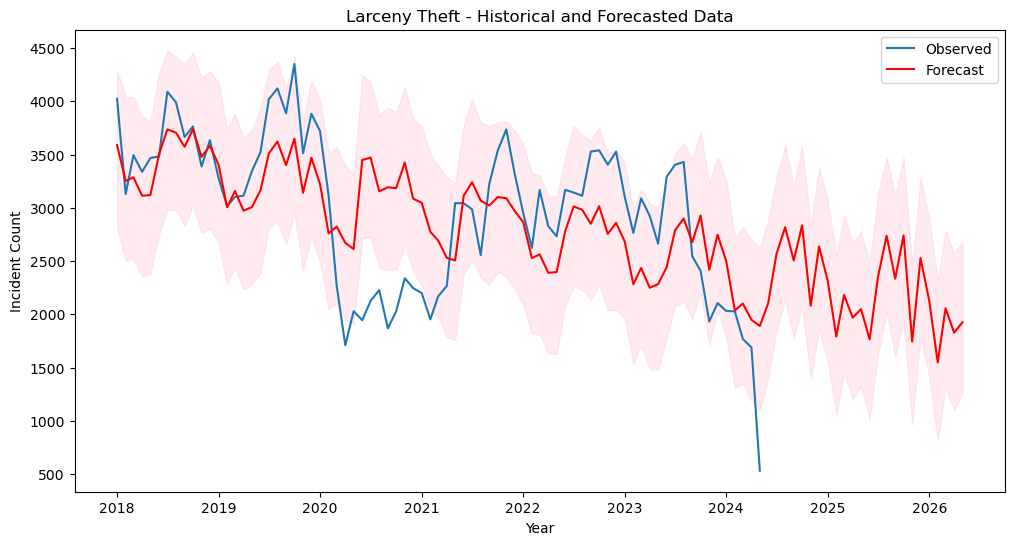

  0%|          | 0/7 [00:00<?, ?it/s]

11:11:54 - cmdstanpy - INFO - Chain [1] start processing
11:11:58 - cmdstanpy - INFO - Chain [1] done processing
11:11:58 - cmdstanpy - INFO - Chain [1] start processing
11:12:06 - cmdstanpy - INFO - Chain [1] done processing
11:12:06 - cmdstanpy - INFO - Chain [1] start processing
11:12:06 - cmdstanpy - INFO - Chain [1] done processing
11:12:06 - cmdstanpy - INFO - Chain [1] start processing
11:12:06 - cmdstanpy - INFO - Chain [1] done processing
11:12:06 - cmdstanpy - INFO - Chain [1] start processing
11:12:06 - cmdstanpy - INFO - Chain [1] done processing
11:12:06 - cmdstanpy - INFO - Chain [1] start processing
11:12:06 - cmdstanpy - INFO - Chain [1] done processing
11:12:06 - cmdstanpy - INFO - Chain [1] start processing
11:12:07 - cmdstanpy - INFO - Chain [1] done processing
11:12:07 - cmdstanpy - INFO - Chain [1] start processing
11:12:07 - cmdstanpy - INFO - Chain [1] done processing


     horizon          mae           mse      mape
0    79 days  1032.495668  1.745519e+06  0.397470
1    81 days  1008.340592  1.654016e+06  0.408162
2    85 days  1049.246722  1.703054e+06  0.433436
3    86 days   893.363685  1.243868e+06  0.351556
4    90 days   830.328654  1.076948e+06  0.320204
..       ...          ...           ...       ...
148 719 days  1527.878781  4.540564e+06  0.524974
149 723 days  1581.013964  4.751181e+06  0.538994
150 724 days  1667.975104  4.943349e+06  0.573164
151 728 days  1545.635402  4.591828e+06  0.545181
152 730 days  1487.528140  4.366468e+06  0.669745

[153 rows x 4 columns]


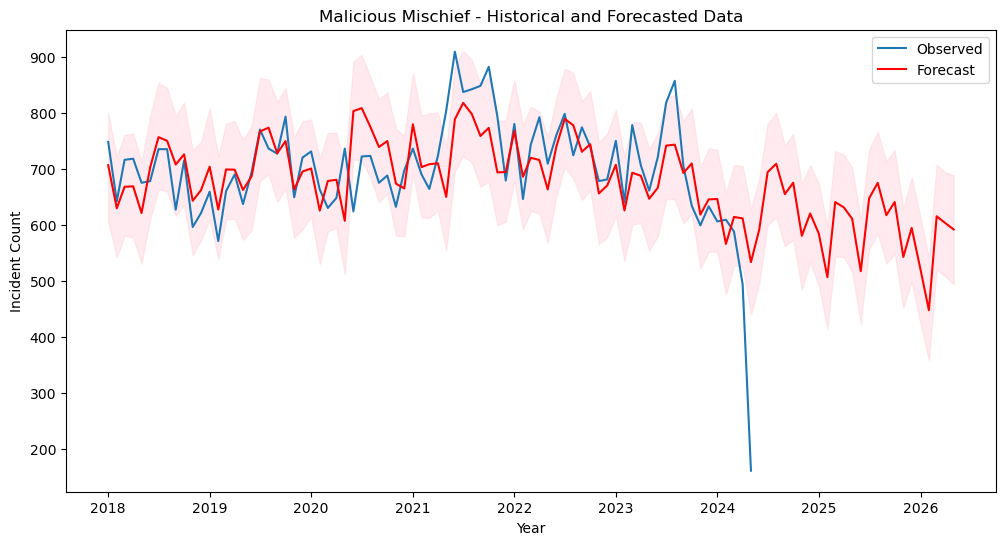

  0%|          | 0/7 [00:00<?, ?it/s]

11:12:07 - cmdstanpy - INFO - Chain [1] start processing
11:12:14 - cmdstanpy - INFO - Chain [1] done processing
11:12:14 - cmdstanpy - INFO - Chain [1] start processing
11:12:22 - cmdstanpy - INFO - Chain [1] done processing
11:12:22 - cmdstanpy - INFO - Chain [1] start processing
11:12:22 - cmdstanpy - INFO - Chain [1] done processing
11:12:22 - cmdstanpy - INFO - Chain [1] start processing
11:12:22 - cmdstanpy - INFO - Chain [1] done processing
11:12:22 - cmdstanpy - INFO - Chain [1] start processing
11:12:23 - cmdstanpy - INFO - Chain [1] done processing
11:12:23 - cmdstanpy - INFO - Chain [1] start processing
11:12:23 - cmdstanpy - INFO - Chain [1] done processing
11:12:23 - cmdstanpy - INFO - Chain [1] start processing
11:12:23 - cmdstanpy - INFO - Chain [1] done processing
11:12:23 - cmdstanpy - INFO - Chain [1] start processing


     horizon         mae           mse      mape
0    79 days   82.189598  10669.134818  0.110316
1    81 days   91.395504  12625.979100  0.122931
2    85 days   95.175595  12945.733161  0.128455
3    86 days   88.449021  11121.653133  0.115555
4    90 days   94.498253  12329.205846  0.125283
..       ...         ...           ...       ...
148 719 days  137.847103  33624.893559  0.208345
149 723 days  141.180884  33839.427843  0.213364
150 724 days  137.118831  33324.221415  0.208220
151 728 days  152.743778  40415.464971  0.236709
152 730 days  197.306317  75534.909162  0.525054

[153 rows x 4 columns]


11:12:23 - cmdstanpy - INFO - Chain [1] done processing


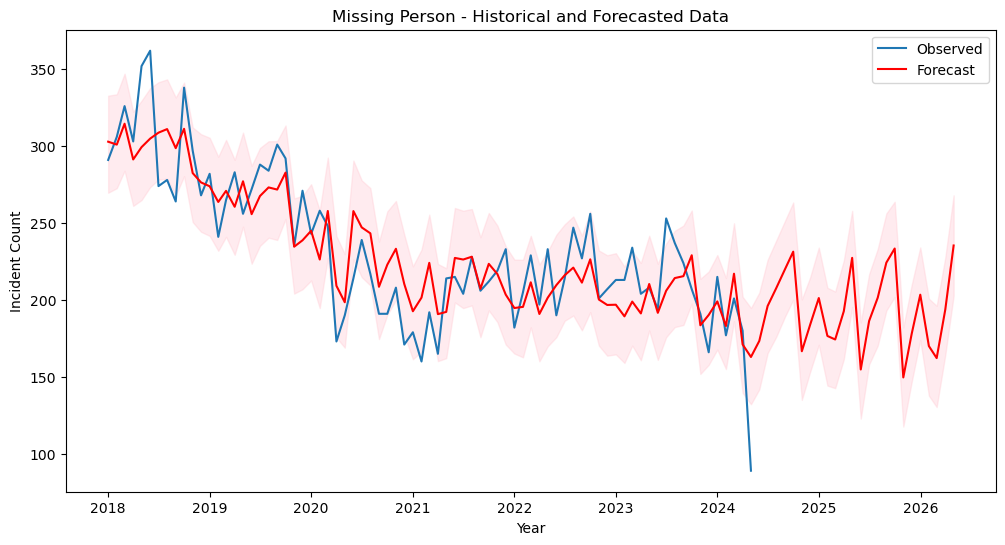

  0%|          | 0/7 [00:00<?, ?it/s]

11:12:24 - cmdstanpy - INFO - Chain [1] start processing
11:12:30 - cmdstanpy - INFO - Chain [1] done processing
11:12:30 - cmdstanpy - INFO - Chain [1] start processing
11:12:38 - cmdstanpy - INFO - Chain [1] done processing
11:12:38 - cmdstanpy - INFO - Chain [1] start processing
11:12:39 - cmdstanpy - INFO - Chain [1] done processing
11:12:39 - cmdstanpy - INFO - Chain [1] start processing
11:12:39 - cmdstanpy - INFO - Chain [1] done processing
11:12:39 - cmdstanpy - INFO - Chain [1] start processing
11:12:39 - cmdstanpy - INFO - Chain [1] done processing
11:12:39 - cmdstanpy - INFO - Chain [1] start processing
11:12:39 - cmdstanpy - INFO - Chain [1] done processing
11:12:39 - cmdstanpy - INFO - Chain [1] start processing
11:12:39 - cmdstanpy - INFO - Chain [1] done processing
11:12:39 - cmdstanpy - INFO - Chain [1] start processing
11:12:40 - cmdstanpy - INFO - Chain [1] done processing


     horizon        mae           mse      mape
0    79 days  63.626093   8574.258763  0.274116
1    81 days  62.444334   8459.837117  0.272040
2    85 days  61.649338   8448.877370  0.269192
3    86 days  49.773963   4849.499837  0.212685
4    90 days  50.654997   4947.235183  0.214048
..       ...        ...           ...       ...
148 719 days  89.385725  10490.577348  0.417426
149 723 days  94.754513  11098.388286  0.444239
150 724 days  97.980974  11651.591983  0.461402
151 728 days  97.935643  11641.364955  0.467037
152 730 days  95.518394  10969.954302  0.508726

[153 rows x 4 columns]


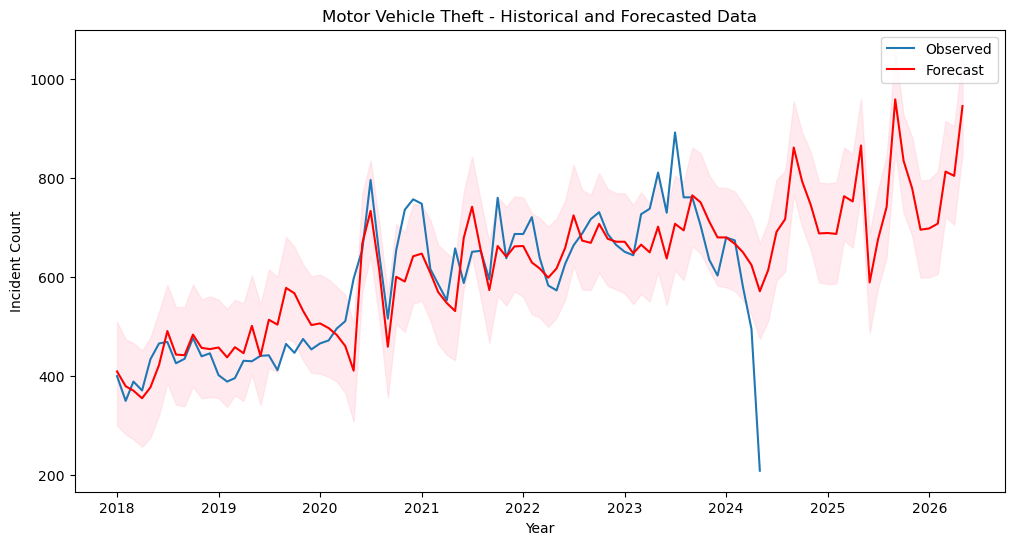

  0%|          | 0/7 [00:00<?, ?it/s]

11:12:40 - cmdstanpy - INFO - Chain [1] start processing
11:12:42 - cmdstanpy - INFO - Chain [1] done processing
11:12:42 - cmdstanpy - INFO - Chain [1] start processing
11:12:50 - cmdstanpy - INFO - Chain [1] done processing
11:12:50 - cmdstanpy - INFO - Chain [1] start processing
11:12:51 - cmdstanpy - INFO - Chain [1] done processing
11:12:51 - cmdstanpy - INFO - Chain [1] start processing
11:12:51 - cmdstanpy - INFO - Chain [1] done processing
11:12:51 - cmdstanpy - INFO - Chain [1] start processing
11:12:51 - cmdstanpy - INFO - Chain [1] done processing
11:12:51 - cmdstanpy - INFO - Chain [1] start processing
11:12:51 - cmdstanpy - INFO - Chain [1] done processing
11:12:51 - cmdstanpy - INFO - Chain [1] start processing
11:12:51 - cmdstanpy - INFO - Chain [1] done processing
11:12:51 - cmdstanpy - INFO - Chain [1] start processing


     horizon         mae            mse      mape
0    79 days   97.850401   12733.499301  0.176250
1    81 days   90.808883   11667.258725  0.159411
2    85 days   88.954347   11375.969362  0.153020
3    86 days   94.999748   12018.740837  0.162280
4    90 days   92.599874   11664.767922  0.159334
..       ...         ...            ...       ...
148 719 days  291.315655   95786.352517  0.453755
149 723 days  307.897531  109047.185033  0.474133
150 724 days  299.716533  104777.953935  0.457275
151 728 days  287.877113   96929.885735  0.443427
152 730 days  314.730612  120761.165517  0.620685

[153 rows x 4 columns]


11:12:52 - cmdstanpy - INFO - Chain [1] done processing


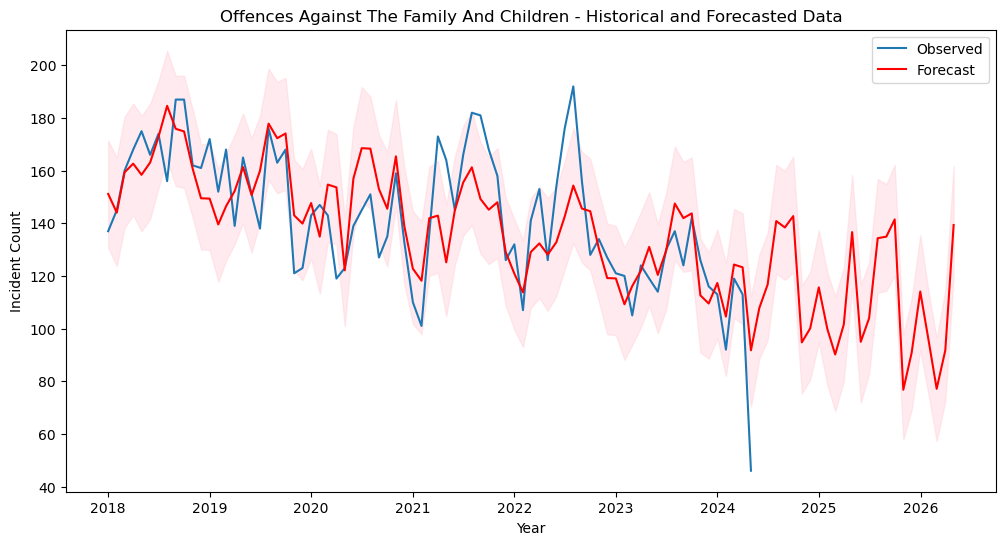

  0%|          | 0/7 [00:00<?, ?it/s]

11:12:52 - cmdstanpy - INFO - Chain [1] start processing
11:12:52 - cmdstanpy - INFO - Chain [1] done processing
11:12:52 - cmdstanpy - INFO - Chain [1] start processing
11:13:01 - cmdstanpy - INFO - Chain [1] done processing
11:13:01 - cmdstanpy - INFO - Chain [1] start processing
11:13:01 - cmdstanpy - INFO - Chain [1] done processing
11:13:01 - cmdstanpy - INFO - Chain [1] start processing
11:13:01 - cmdstanpy - INFO - Chain [1] done processing
11:13:01 - cmdstanpy - INFO - Chain [1] start processing
11:13:01 - cmdstanpy - INFO - Chain [1] done processing
11:13:01 - cmdstanpy - INFO - Chain [1] start processing
11:13:01 - cmdstanpy - INFO - Chain [1] done processing
11:13:01 - cmdstanpy - INFO - Chain [1] start processing
11:13:02 - cmdstanpy - INFO - Chain [1] done processing
11:13:02 - cmdstanpy - INFO - Chain [1] start processing
11:13:02 - cmdstanpy - INFO - Chain [1] done processing


     horizon        mae          mse      mape
0    79 days  31.280447  1539.349932  0.213274
1    81 days  33.023823  1907.343922  0.224820
2    85 days  31.556333  1867.814427  0.213080
3    86 days  34.100291  1992.969534  0.226607
4    90 days  34.204407  1998.111567  0.230304
..       ...        ...          ...       ...
148 719 days  52.147607  3427.005196  0.352619
149 723 days  49.897432  3171.830006  0.344874
150 724 days  46.004523  2899.992623  0.317574
151 728 days  44.683337  2820.190922  0.310978
152 730 days  49.850647  3299.552819  0.427163

[153 rows x 4 columns]


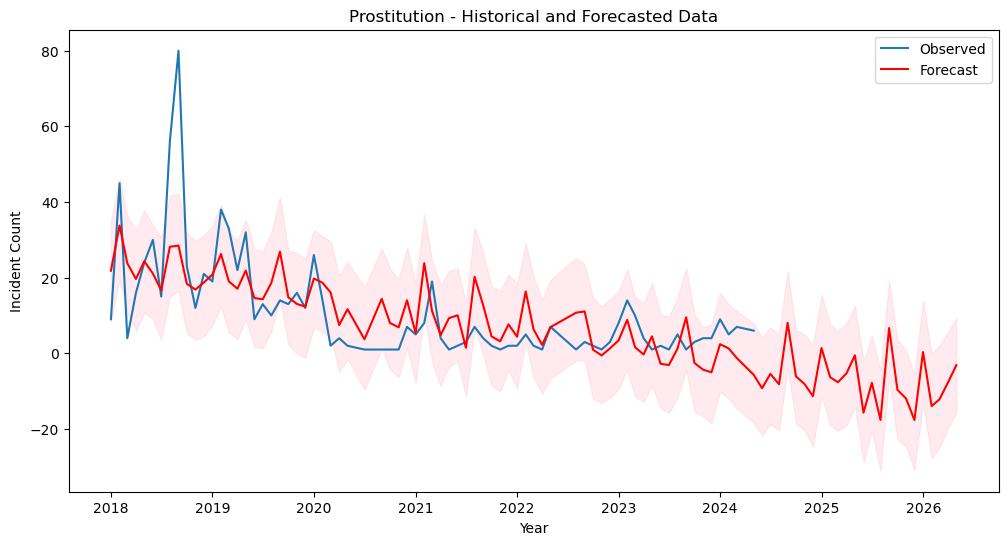

  0%|          | 0/7 [00:00<?, ?it/s]

11:13:02 - cmdstanpy - INFO - Chain [1] start processing
11:13:09 - cmdstanpy - INFO - Chain [1] done processing
11:13:09 - cmdstanpy - INFO - Chain [1] start processing
11:13:09 - cmdstanpy - INFO - Chain [1] done processing
11:13:09 - cmdstanpy - INFO - Chain [1] start processing
11:13:09 - cmdstanpy - INFO - Chain [1] done processing
11:13:09 - cmdstanpy - INFO - Chain [1] start processing
11:13:09 - cmdstanpy - INFO - Chain [1] done processing
11:13:09 - cmdstanpy - INFO - Chain [1] start processing
11:13:09 - cmdstanpy - INFO - Chain [1] done processing
11:13:09 - cmdstanpy - INFO - Chain [1] start processing
11:13:09 - cmdstanpy - INFO - Chain [1] done processing
11:13:10 - cmdstanpy - INFO - Chain [1] start processing
11:13:10 - cmdstanpy - INFO - Chain [1] done processing
11:13:10 - cmdstanpy - INFO - Chain [1] start processing
11:13:10 - cmdstanpy - INFO - Chain [1] done processing


     horizon        mae          mse       mape
0    86 days  26.960257  1254.859513   6.859790
1    90 days  26.328081  1245.329876   6.806116
2    91 days  25.554912  1230.030575   6.991942
3   106 days  32.987148  2315.661240   7.440466
4   108 days  34.508444  2360.858246   8.201114
..       ...        ...          ...        ...
134 719 days  37.777694  3354.932498  20.831991
135 723 days  34.156969  3078.403705  20.478385
136 724 days  33.673193  3073.154445  20.296396
137 728 days  34.644047  3108.015718  20.479818
138 730 days  35.326112  3143.693300  20.687000

[139 rows x 4 columns]


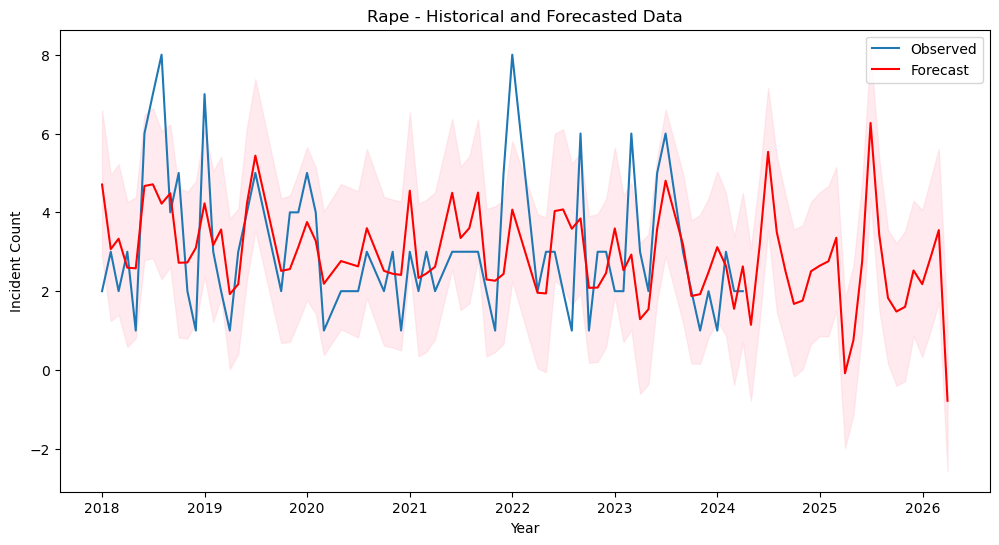

  0%|          | 0/7 [00:00<?, ?it/s]

11:13:10 - cmdstanpy - INFO - Chain [1] start processing
11:13:16 - cmdstanpy - INFO - Chain [1] done processing
11:13:16 - cmdstanpy - INFO - Chain [1] start processing
11:13:24 - cmdstanpy - INFO - Chain [1] done processing
11:13:24 - cmdstanpy - INFO - Chain [1] start processing
11:13:24 - cmdstanpy - INFO - Chain [1] done processing
11:13:24 - cmdstanpy - INFO - Chain [1] start processing
11:13:24 - cmdstanpy - INFO - Chain [1] done processing
11:13:24 - cmdstanpy - INFO - Chain [1] start processing
11:13:24 - cmdstanpy - INFO - Chain [1] done processing
11:13:25 - cmdstanpy - INFO - Chain [1] start processing
11:13:25 - cmdstanpy - INFO - Chain [1] done processing
11:13:25 - cmdstanpy - INFO - Chain [1] start processing
11:13:25 - cmdstanpy - INFO - Chain [1] done processing
11:13:25 - cmdstanpy - INFO - Chain [1] start processing
11:13:25 - cmdstanpy - INFO - Chain [1] done processing


     horizon       mae        mse      mape
0    78 days  2.405369  10.662190  0.725850
1    80 days  3.145417  18.436147  1.096731
2    84 days  2.673354  15.085331  0.980172
3    85 days  2.445668  14.140351  0.860598
4    89 days  2.808553  16.175816  0.902025
..       ...       ...        ...       ...
126 719 days  4.191766  25.478585  1.946530
127 722 days  3.829856  22.263293  1.833744
128 724 days  3.729310  21.613205  1.800229
129 727 days  3.316419  18.197341  1.342828
130 730 days  3.364699  18.282834  1.366968

[131 rows x 4 columns]


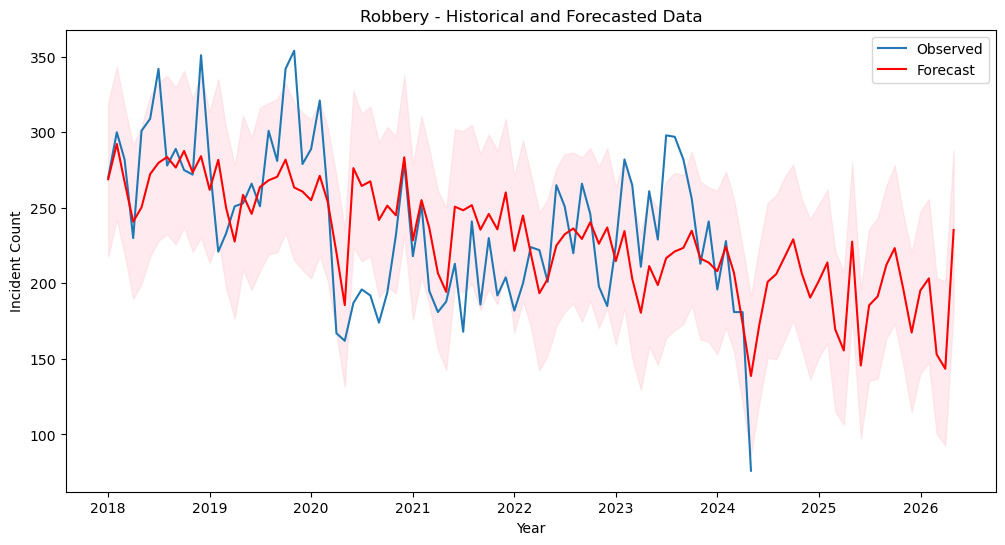

  0%|          | 0/7 [00:00<?, ?it/s]

11:13:25 - cmdstanpy - INFO - Chain [1] start processing
11:13:32 - cmdstanpy - INFO - Chain [1] done processing
11:13:32 - cmdstanpy - INFO - Chain [1] start processing
11:13:41 - cmdstanpy - INFO - Chain [1] done processing
11:13:41 - cmdstanpy - INFO - Chain [1] start processing
11:13:41 - cmdstanpy - INFO - Chain [1] done processing
11:13:41 - cmdstanpy - INFO - Chain [1] start processing
11:13:41 - cmdstanpy - INFO - Chain [1] done processing
11:13:41 - cmdstanpy - INFO - Chain [1] start processing
11:13:41 - cmdstanpy - INFO - Chain [1] done processing
11:13:41 - cmdstanpy - INFO - Chain [1] start processing
11:13:42 - cmdstanpy - INFO - Chain [1] done processing
11:13:42 - cmdstanpy - INFO - Chain [1] start processing
11:13:42 - cmdstanpy - INFO - Chain [1] done processing
11:13:42 - cmdstanpy - INFO - Chain [1] start processing


     horizon         mae           mse      mape
0    79 days  119.120867  27036.679496  0.494310
1    81 days  118.308663  27008.749316  0.492225
2    85 days  120.272196  27468.432878  0.502450
3    86 days  114.702887  26467.298938  0.469273
4    90 days  104.170380  24576.645944  0.432147
..       ...         ...           ...       ...
148 719 days  127.807452  34588.024921  0.619081
149 723 days  120.841679  33371.466383  0.580987
150 724 days  128.262212  34405.574758  0.609011
151 728 days  122.207314  33292.718191  0.588789
152 730 days  113.598549  31748.205654  0.568523

[153 rows x 4 columns]


11:13:42 - cmdstanpy - INFO - Chain [1] done processing


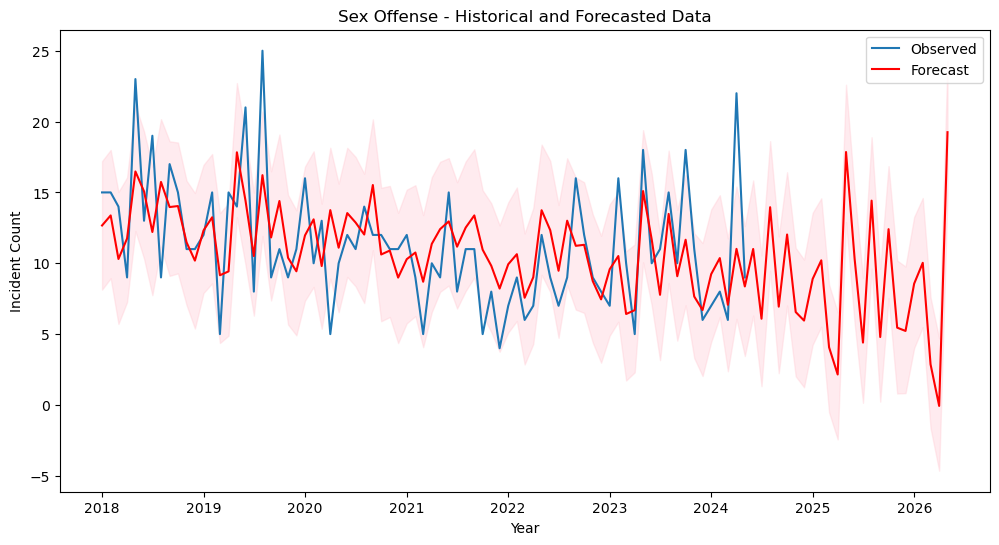

  0%|          | 0/7 [00:00<?, ?it/s]

11:13:43 - cmdstanpy - INFO - Chain [1] start processing
11:13:44 - cmdstanpy - INFO - Chain [1] done processing
11:13:44 - cmdstanpy - INFO - Chain [1] start processing
11:13:52 - cmdstanpy - INFO - Chain [1] done processing
11:13:52 - cmdstanpy - INFO - Chain [1] start processing
11:13:52 - cmdstanpy - INFO - Chain [1] done processing
11:13:52 - cmdstanpy - INFO - Chain [1] start processing
11:13:52 - cmdstanpy - INFO - Chain [1] done processing
11:13:52 - cmdstanpy - INFO - Chain [1] start processing
11:13:52 - cmdstanpy - INFO - Chain [1] done processing
11:13:52 - cmdstanpy - INFO - Chain [1] start processing
11:13:53 - cmdstanpy - INFO - Chain [1] done processing
11:13:53 - cmdstanpy - INFO - Chain [1] start processing
11:13:53 - cmdstanpy - INFO - Chain [1] done processing
11:13:53 - cmdstanpy - INFO - Chain [1] start processing


     horizon       mae         mse      mape
0    79 days  7.759662  122.382211  0.669150
1    81 days  9.941484  213.952609  0.830248
2    85 days  9.492736  208.583715  0.792473
3    86 days  8.852493  201.270942  0.739398
4    90 days  8.353795  196.150890  0.695506
..       ...       ...         ...       ...
148 719 days  8.885079  116.943571  0.884400
149 723 days  8.280545  104.964601  0.835846
150 724 days  8.650452  109.279016  0.836448
151 728 days  8.537159  107.286722  0.843370
152 730 days  8.082626  101.071614  0.800139

[153 rows x 4 columns]


11:13:53 - cmdstanpy - INFO - Chain [1] done processing


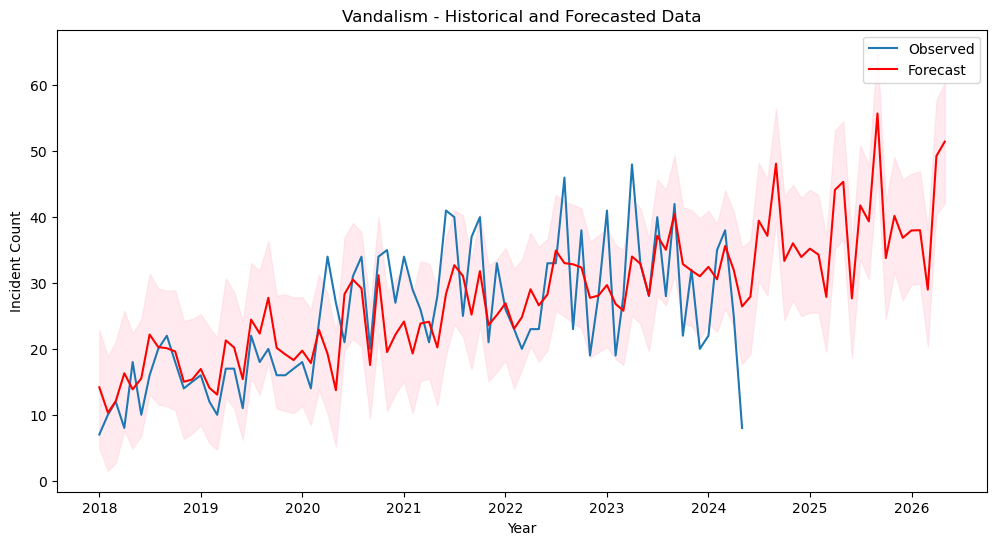

  0%|          | 0/7 [00:00<?, ?it/s]

11:13:53 - cmdstanpy - INFO - Chain [1] start processing
11:13:54 - cmdstanpy - INFO - Chain [1] done processing
11:13:54 - cmdstanpy - INFO - Chain [1] start processing
11:14:02 - cmdstanpy - INFO - Chain [1] done processing
11:14:02 - cmdstanpy - INFO - Chain [1] start processing
11:14:02 - cmdstanpy - INFO - Chain [1] done processing
11:14:02 - cmdstanpy - INFO - Chain [1] start processing
11:14:02 - cmdstanpy - INFO - Chain [1] done processing
11:14:02 - cmdstanpy - INFO - Chain [1] start processing
11:14:02 - cmdstanpy - INFO - Chain [1] done processing
11:14:03 - cmdstanpy - INFO - Chain [1] start processing
11:14:03 - cmdstanpy - INFO - Chain [1] done processing
11:14:03 - cmdstanpy - INFO - Chain [1] start processing
11:14:03 - cmdstanpy - INFO - Chain [1] done processing
11:14:03 - cmdstanpy - INFO - Chain [1] start processing
11:14:03 - cmdstanpy - INFO - Chain [1] done processing


     horizon        mae         mse      mape
0    79 days   8.443430  115.664656  0.339378
1    81 days   8.407492  115.254140  0.315264
2    85 days   8.470186  115.906418  0.310275
3    86 days   8.166411  106.903108  0.289910
4    90 days   8.016657  103.907818  0.287907
..       ...        ...         ...       ...
148 719 days   9.873095  155.206450  0.362939
149 723 days  10.011002  159.785597  0.395001
150 724 days  10.659950  168.587246  0.412708
151 728 days  10.318184  159.989535  0.390325
152 730 days  11.612093  217.715064  0.618779

[153 rows x 4 columns]


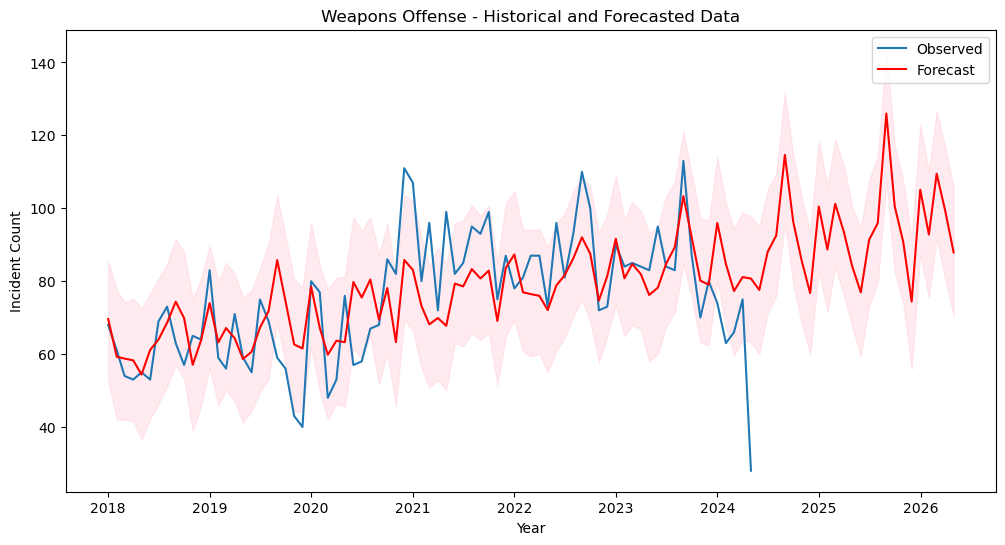

  0%|          | 0/7 [00:00<?, ?it/s]

11:14:03 - cmdstanpy - INFO - Chain [1] start processing
11:14:05 - cmdstanpy - INFO - Chain [1] done processing
11:14:05 - cmdstanpy - INFO - Chain [1] start processing
11:14:13 - cmdstanpy - INFO - Chain [1] done processing
11:14:13 - cmdstanpy - INFO - Chain [1] start processing
11:14:13 - cmdstanpy - INFO - Chain [1] done processing
11:14:13 - cmdstanpy - INFO - Chain [1] start processing
11:14:13 - cmdstanpy - INFO - Chain [1] done processing
11:14:13 - cmdstanpy - INFO - Chain [1] start processing
11:14:13 - cmdstanpy - INFO - Chain [1] done processing
11:14:13 - cmdstanpy - INFO - Chain [1] start processing
11:14:14 - cmdstanpy - INFO - Chain [1] done processing
11:14:14 - cmdstanpy - INFO - Chain [1] start processing
11:14:14 - cmdstanpy - INFO - Chain [1] done processing
11:14:14 - cmdstanpy - INFO - Chain [1] start processing


     horizon        mae          mse      mape
0    79 days  18.628178   663.759466  0.253600
1    81 days  18.087574   655.627037  0.243120
2    85 days  16.298770   551.905311  0.186930
3    86 days  15.705948   544.441266  0.175849
4    90 days  12.967094   336.427641  0.154524
..       ...        ...          ...       ...
148 719 days  28.268411  1001.711178  0.319662
149 723 days  25.904998   882.574846  0.295483
150 724 days  25.296068   844.226685  0.289406
151 728 days  25.730699   882.963980  0.308955
152 730 days  29.640835  1375.567108  0.496066

[153 rows x 4 columns]


11:14:15 - cmdstanpy - INFO - Chain [1] done processing


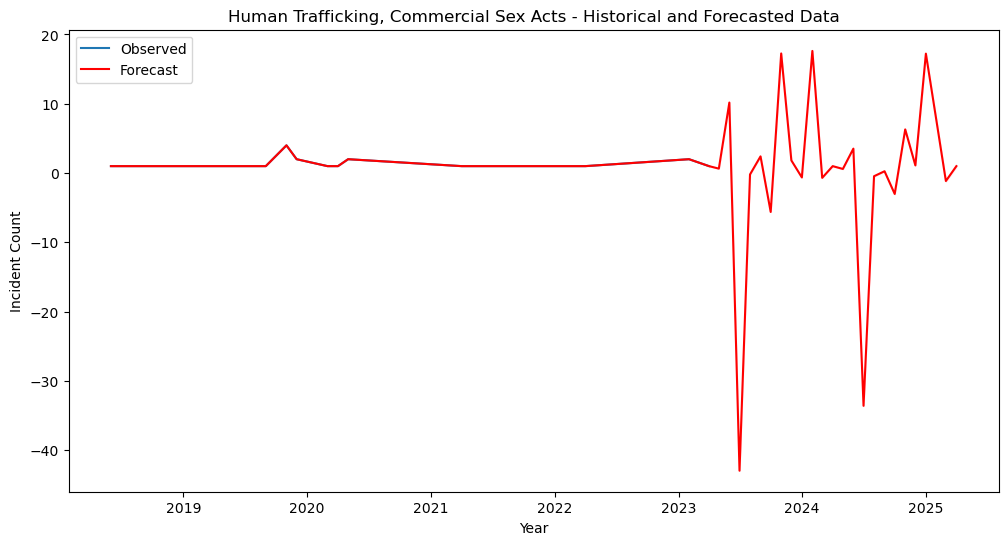

  0%|          | 0/4 [00:00<?, ?it/s]

11:14:15 - cmdstanpy - INFO - Chain [1] start processing
11:14:16 - cmdstanpy - INFO - Chain [1] done processing
11:14:16 - cmdstanpy - INFO - Chain [1] start processing
11:14:21 - cmdstanpy - INFO - Chain [1] done processing
11:14:21 - cmdstanpy - INFO - Chain [1] start processing
11:14:22 - cmdstanpy - INFO - Chain [1] done processing


    horizon        mae         mse      mape
0   23 days   3.000000    9.000000  0.750000
1   25 days  14.254710  203.196750  7.127355
2   53 days   1.000000    1.000000  0.500000
3  144 days   0.000000    0.000000  0.000000
4  175 days   0.000000    0.000000  0.000000
5  180 days   3.635909   13.219835  3.635909
6  183 days   4.974660   24.747241  4.974660
7  205 days   1.000000    1.000000  0.500000
8  360 days   4.318772   18.651795  4.318772
9  363 days   1.458705    2.127819  1.458705
10 365 days   0.009959    0.000099  0.009959
11 540 days   0.000000    0.000000  0.000000
12 543 days   9.112416   83.036134  9.112416
13 545 days   7.237177   52.376736  7.237177
14 671 days  10.307084  106.235972  5.153542
15 723 days   0.000000    0.000000  0.000000
16 725 days   8.603155   74.014268  8.603155
17 730 days   0.028246    0.000798  0.028246
Not enough data to model category: Human Trafficking (B), Involuntary Servitude


In [26]:
# Data Preprocessing and Aggregation
# Convert columns to appropriate data types
df_forecast['Incident Year'] = df_forecast['Incident Year'].astype(int)
df_forecast['Incident Date'] = pd.to_datetime(df_forecast['Incident Date'], errors='coerce')
df_forecast['Incident Category'] = df_forecast['Incident Category'].astype(str)

# Filter data starting from January 2018
df_forecast = df_forecast[df_forecast['Incident Date'] >= '2018-01-01']

# Check for and handle missing or incorrect dates
df_forecast = df_forecast.dropna(subset=['Incident Date'])

# Create a 'date' column
df_forecast['date'] = df_forecast['Incident Date'].dt.to_period('M').dt.to_timestamp()

# Aggregate data by date and incident category, summing the counts
aggregated_data = df_forecast.groupby(['date', 'Incident Category']).size().reset_index(name='count')

def forecast_category(aggregated_data, category):
    category_data = aggregated_data[aggregated_data['Incident Category'] == category]
    ts_data = category_data[['date', 'count']].rename(columns={'date': 'ds', 'count': 'y'})

    # Check if there is enough data (at least 12 data points)
    if len(ts_data) < 12:
        print(f"Not enough data to model category: {category}")
        return

    model = Prophet()
    model.fit(ts_data)
    future = model.make_future_dataframe(periods=24, freq='M')
    forecast = model.predict(future)

    plt.figure(figsize=(12, 6))
    plt.plot(ts_data['ds'], ts_data['y'], label='Observed')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='r')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
    plt.title(f'{category} - Historical and Forecasted Data')
    plt.xlabel('Year')
    plt.ylabel('Incident Count')
    plt.legend()
    plt.savefig(f'../images/forecasting/{category}_forecast.png')
    plt.show()
    
    return model

def evaluate_model(model, ts_data):
    # Perform cross-validation
    df_cv = cross_validation(model, initial='366 days', period='180 days', horizon='730 days')
    
    # Calculate performance metrics
    df_performance = performance_metrics(df_cv)
    
    print(df_performance[['horizon', 'mae', 'mse', 'mape']])
    
    return df_cv, df_performance

# Example usage
# Identify all unique incident categories
categories = aggregated_data['Incident Category'].unique()

for category in categories:
    model = forecast_category(aggregated_data, category)
    if model is not None:
        ts_data = aggregated_data[aggregated_data['Incident Category'] == category][['date', 'count']].rename(columns={'date': 'ds', 'count': 'y'})
        df_cv, df_performance = evaluate_model(model, ts_data)